In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  portfolio import *

In [75]:
#讀取資料
f = open('量化金融概論data.csv')
price= pd.read_csv(f)
price.head(10000)

,00762元大全球 AI,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,2363矽統,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,2471資通,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Date,Open,High,Low,Close,Adj Close,Volume,NaN,Date,Open,...,Adj Close,Volume,NaN,Date,Open,High,Low,Close,Adj Close,Volume
1,2019/1/1,19.99,20.08,19.33,19.780001,19.780001,27716814,NaN,2019/1/1,9.36,...,10.900653,729704697,NaN,2019/1/1,14.75,15,14.45,14.65,13.769114,926735
2,2019/2/1,19.780001,22.120001,19.780001,22.07,22.07,11537223,NaN,2019/2/1,8.85,...,10.996693,551352738,NaN,2019/2/1,14.65,15.5,14.5,15.3,14.380032,961674
3,2019/3/1,22.07,23.040001,21.48,22.280001,22.280001,5934279,NaN,2019/3/1,8.86,...,11.188775,501860901,NaN,2019/3/1,15.3,17.299999,15.1,16.85,15.836832,9088738
4,2019/4/1,22.6,24.58,22.6,23.74,23.74,23561760,NaN,2019/4/1,8.05,...,12.917513,1227709534,NaN,2019/4/1,17,19.549999,16.299999,18.1,17.011671,14721854
5,2019/5/1,23.74,23.74,21.299999,21.41,21.41,10237190,NaN,2019/5/1,8.84,...,12.389287,1059571017,NaN,2019/5/1,18.1,18.85,16.6,17.5,16.447748,4690012
6,2019/6/1,21.309999,22.6,20.629999,22.5,22.5,5639001,NaN,2019/6/1,8.12,...,13.397717,738605729,NaN,2019/6/1,17.5,18.700001,17.049999,18,16.917683,3327144
7,2019/7/1,22.690001,24.459999,22.690001,24.4,24.4,8477207,NaN,2019/7/1,8.23,...,13.253656,972050498,NaN,2019/7/1,18.049999,18.85,16.799999,16.9,15.883824,4793237
8,2019/8/1,24,24.02,22.719999,23.370001,23.370001,6017000,NaN,2019/8/1,8.31,...,13.45,591753140,NaN,2019/8/1,16.85,19.75,15.9,19,19,7666149
9,2019/9/1,23.370001,24.459999,23.32,23.809999,23.809999,3881845,NaN,2019/9/1,8.02,...,13.4,464609029,NaN,2019/9/1,19,21.299999,18.75,19.85,19.85,14119871


In [76]:
#價格變動
k=price[['Unnamed: 5','Unnamed: 13','Unnamed: 21','Unnamed: 29','Unnamed: 37']]
k1=k[1:13]
k2=k[19:31]

In [77]:
#利用 dataframe把價格先記錄下來並計算 報酬率=(p[i+1]-p[i])/p[i] 並重新編號為1~10種股票
x=pd.concat([pd.DataFrame(k1.values, columns=list(range(1, 6))), pd.DataFrame(k2.values, columns=list(range(6, 11)))], axis = 1).astype(float).pct_change()
x=x.drop(0)
print(x)
type(x)

          1         2         3         4         5         6         7   \
1   0.115773  0.001130  0.024390  0.008810  0.044369  0.036778  0.038647   
2   0.009515 -0.093679  0.000000  0.017467  0.101307  0.045608  0.060465   
3   0.065530  0.100872 -0.002646  0.154506  0.074184  0.014540  0.043860   
4  -0.098147 -0.087104 -0.005305 -0.040892 -0.033149 -0.020701  0.029412   
5   0.050911  0.006196  0.016000  0.081395  0.028571  0.026016  0.065306   
6   0.084444  0.030788 -0.028871 -0.010753 -0.061111 -0.012678 -0.049809   
7  -0.042213 -0.044205  0.045485  0.014814  0.196186  0.190892  0.004803   
8   0.018827  0.016250  0.010782 -0.003717  0.044737 -0.031700  0.021097   
9   0.005880  0.000000  0.021333  0.044776 -0.052897 -0.005952  0.033058   
10  0.031733 -0.002460 -0.007833  0.067857 -0.039894 -0.041916  0.028000   
11  0.034804  0.125771  0.013158  0.100335  0.036011  0.023438  0.011673   

          8         9         10  
1   0.155340  0.118467  0.018564  
2  -0.094538 -0.0

pandas.core.frame.DataFrame

In [78]:
#計算每行平均值 i.e.每支股票平均月報酬
mean = x.mean()
mean

1     0.025187
2     0.004869
3     0.007863
4     0.039509
5     0.030756
6     0.020393
7     0.026047
8     0.002830
9    -0.007756
10    0.014731
dtype: float64

In [79]:
#計算每行標準差 i.e.每支股票平均月風險
x.std()

1     0.058783
2     0.067311
3     0.019784
4     0.056927
5     0.076913
6     0.063342
7     0.031149
8     0.082022
9     0.055633
10    0.032887
dtype: float64

In [80]:
#計算各股之間的共變異數
x.cov()

,1,2,3,4,5,6,7,8,9,10
1,0.003455,0.002244,-0.000201,0.001283,-0.000577,-0.000692,-0.000138,0.003091,0.001953,-0.000854
2,0.002244,0.004531,-0.000115,0.002732,-0.000574,-0.000819,-0.000475,0.002660,0.000225,-0.001356
3,-0.000201,-0.000115,0.000391,0.000060,0.000969,0.000884,0.000199,0.000634,0.000367,0.000194
4,0.001283,0.002732,0.000060,0.003241,0.000587,-0.000021,0.000605,0.000968,-0.000724,-0.000524
5,-0.000577,-0.000574,0.000969,0.000587,0.005916,0.004150,0.000566,0.000062,0.000276,0.001343
6,-0.000692,-0.000819,0.000884,-0.000021,0.004150,0.004012,-0.000015,0.001114,0.000148,0.001428
7,-0.000138,-0.000475,0.000199,0.000605,0.000566,-0.000015,0.000970,-0.000300,0.000045,0.000100
8,0.003091,0.002660,0.000634,0.000968,0.000062,0.001114,-0.000300,0.006728,0.002737,-0.000384
9,0.001953,0.000225,0.000367,-0.000724,0.000276,0.000148,0.000045,0.002737,0.003095,-0.000455
10,-0.000854,-0.001356,0.000194,-0.000524,0.001343,0.001428,0.000100,-0.000384,-0.000455,0.001082


In [81]:
#隨機生成一個比重給10支股票 就能利用投資學的公式算出標準差以及平均報酬 (1 point)
weights = np.random.random(10)
weights /= np.sum(weights)
def ret(weights):
    return ((1+np.sum(x.mean()*weights))**12)-1
def sd(weights):
    return np.sqrt(np.dot(weights.T, np.dot(x.cov()*12,weights)))

In [82]:
#隨機生成比重的報酬率
print(ret(weights))

0.2828263452836557


In [83]:
#隨機生成比重的標準差
print(sd(weights))

0.100835173762


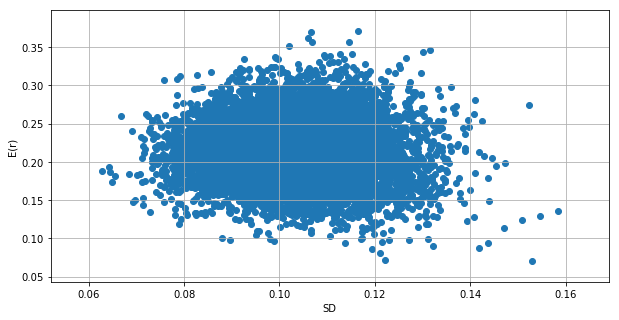

In [84]:
#隨機生成10000種比重把10000個點的報酬及標準差都標出來
all_returns = []

all_std = []

for i in range(10000):
    weights = np.random.random(10)
    weights /= np.sum(weights) 
    all_returns.append(((1+np.sum(x.mean()*weights))**12)-1)
    all_std.append(np.sqrt(np.dot(weights.T, np.dot(x.cov()*12,weights))))

plt.figure(figsize = (10,5))
plt.scatter(all_std, all_returns)
plt.grid(True)
plt.xlabel('SD')
plt.ylabel('E(r)')

# 我們的目標基本上是要此圖形最左邊那些點的連線，所以要minimize sd

In [85]:
#給定比重就能把報酬跟標準差一起算出來
def want(weights):
    weights = np.array(weights)
    want_returns=((1+np.sum(x.mean()*weights))**12)-1
    want_sd=np.sqrt(np.dot(weights.T, np.dot(x.cov()*12,weights)))
    return np.array([want_returns,want_sd])

In [86]:
#使用scipy.optimize模組中的 minimize函數來最小化標準差
import scipy.optimize as sco


In [87]:
#初始條件及限制式
x0=[1/10 for i in range(10)]
bounds=tuple((0,1) for i in range(10))
constraints=({'type':'eq','fun':lambda x:np.sum(x)-1})

In [88]:
#可以找到效率前沿中標準差最低的股票組成比重
x0=[1/10 for i in range(10)]
bounds=tuple((0,1) for i in range(10))
constraints=({'type':'eq','fun':lambda x:np.sum(x)-1})

optimal=sco.minimize(sd ,
                     x0,
                     method='SLSQP',
                     bounds=bounds,
                     constraints=constraints)
optimal
optimal['x'].round(3)

array([ 0.036,  0.152,  0.223,  0.   ,  0.   ,  0.   ,  0.186,  0.   ,
        0.05 ,  0.353])

In [89]:
#此比重可以得到的報酬以及標準差
want(optimal['x']).round(3)

array([ 0.168,  0.047])

In [90]:
#為了畫出最小標準差曲線 要給定不同的報酬水準，算出此報酬下最小標準差

given_r=np.linspace(0.01,0.5,50)
std=[]
for i in given_r:
    constraints=({'type':'eq','fun':lambda x: want(x)[0]-i},
                 {'type':'eq','fun':lambda x:np.sum(x)-1})
    res=sco.minimize(sd,
                     x0,
                     method='SLSQP',
                     bounds=bounds,
                     constraints=constraints)
    std.append(res['fun'])
std=np.array(std)
print(std)

[ 0.10154269  0.09398684  0.08675556  0.07990942  0.07352768  0.06770904
  0.06258101  0.0582922   0.05500451  0.05282056  0.05112739  0.04972772
  0.04863231  0.04785354  0.04740474  0.0472456   0.04721884  0.04731622
  0.0475084   0.04787853  0.04852661  0.04943813  0.05059266  0.05196925
  0.05354529  0.05525627  0.057014    0.05880968  0.06063877  0.06249573
  0.06437705  0.06628362  0.06848945  0.07114429  0.07418401  0.07752401
  0.0810657   0.084777    0.08863112  0.0926041   0.09667555  0.10082963
  0.10505025  0.10932665  0.1136478   0.11811441  0.12280032  0.12767292
  0.13270667  0.13787789]


(0, 0.2)

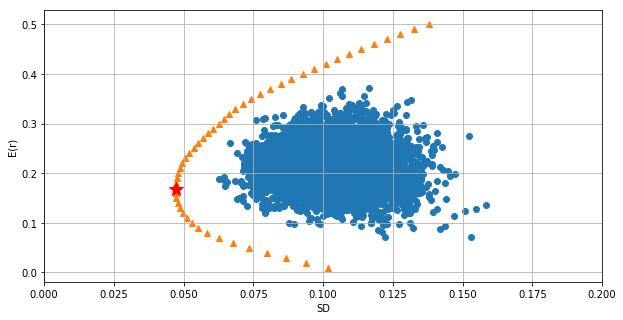

In [91]:
#把隨機生成的投資組合以及最小標準差的圖疊加

plt.figure(figsize=(10,5))
plt.scatter(all_std, all_returns,marker='o')
plt.scatter(std,given_r,marker='^')
plt.plot(want(optimal['x'])[1],want(optimal['x'])[0],'r*',markersize=15)
plt.grid(True)
plt.xlabel('SD')
plt.ylabel('E(r)')
plt.xlim([0,0.2])


In [92]:
#用投資學所學找 rf=0.01(活存利率)與效率前沿的切線
import scipy.interpolate as sci
ind = np.argmin(std)
estd = std[ind:]
egiven_r=given_r[ind:]
tck=sci.splrep(estd , egiven_r) #找到一維曲線的 B-spline表示效率前沿。

def f(x):
    return sci.splev(x,tck,der=0)
def df(x):
    return sci.splev(x,tck,der=1)


In [93]:
import scipy.optimize as sco

def equations(p,rf=0.011):
    eq1= rf -p[0]
    eq2= rf +(p[1]*p[2])-f(p[2])
    eq3= p[1]-df(p[2])
    return eq1,eq2,eq3

opt= sco.fsolve(equations,[0.011,0.5,0.06])
opt


array([ 0.011     ,  4.66356869,  0.06703306])

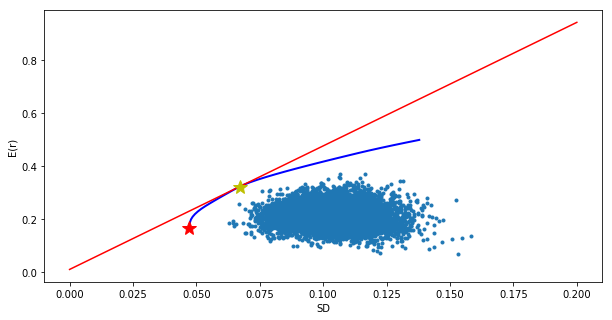

In [94]:
#投資組合及效率前沿還有 CAL線
#紅點是最小標準差 黃點是CAL線與效率前沿的切點
plt.figure(figsize=(10, 5))
plt.scatter(all_std, all_returns, marker='.')
plt.plot(estd, egiven_r, 'b', lw=2.0)
cx = np.linspace(0.0, 0.2)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0)
plt.plot(want(optimal['x'])[1],want(optimal['x'])[0],'r*',markersize=15)
plt.xlabel('SD')
plt.ylabel('E(r)')
plt.show()

In [95]:
#解交點的比重
x0=[1/10 for i in range(10)]
bounds=tuple((0,1) for i in range(10))

cons = ({'type': 'eq', 'fun': lambda x:  want(x)[0] - f(opt[2])},
               {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
ans = sco.minimize(sd, 
                   x0, 
                   method='SLSQP',
                   bounds=bounds, 
                   constraints=cons)
ans['x'].round(2)

array([ 0.17,  0.  ,  0.  ,  0.14,  0.  ,  0.  ,  0.33,  0.  ,  0.  ,  0.36])

In [96]:
#計算此比重的 E(r) & SD
want(ans['x'])

array([ 0.32361327,  0.06702537])

In [97]:
#E(r)為 32.36% SD 為 6.7%